The objective of this project is to build a predictive model using the Random Forest classifier to determine customer satisfaction based on a range of features related to demographics, flight experience, and service quality. By analyzing this data, airlines can identify key factors affecting customer satisfaction and improve their services.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [21]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR.NO                              103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [23]:
data.columns

Index(['SR.NO', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [24]:
data.drop(columns=['SR.NO', 'id'], inplace=True)

In [25]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [26]:
data['Arrival Delay in Minutes'].fillna(0, inplace=True)

C:\Users\91770\AppData\Local\Temp\ipykernel_10652\712518833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(0, inplace=True)


In [27]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [28]:
Categorical = data.select_dtypes(include=['object']).columns.drop('satisfaction')

<function matplotlib.pyplot.show(close=None, block=None)>

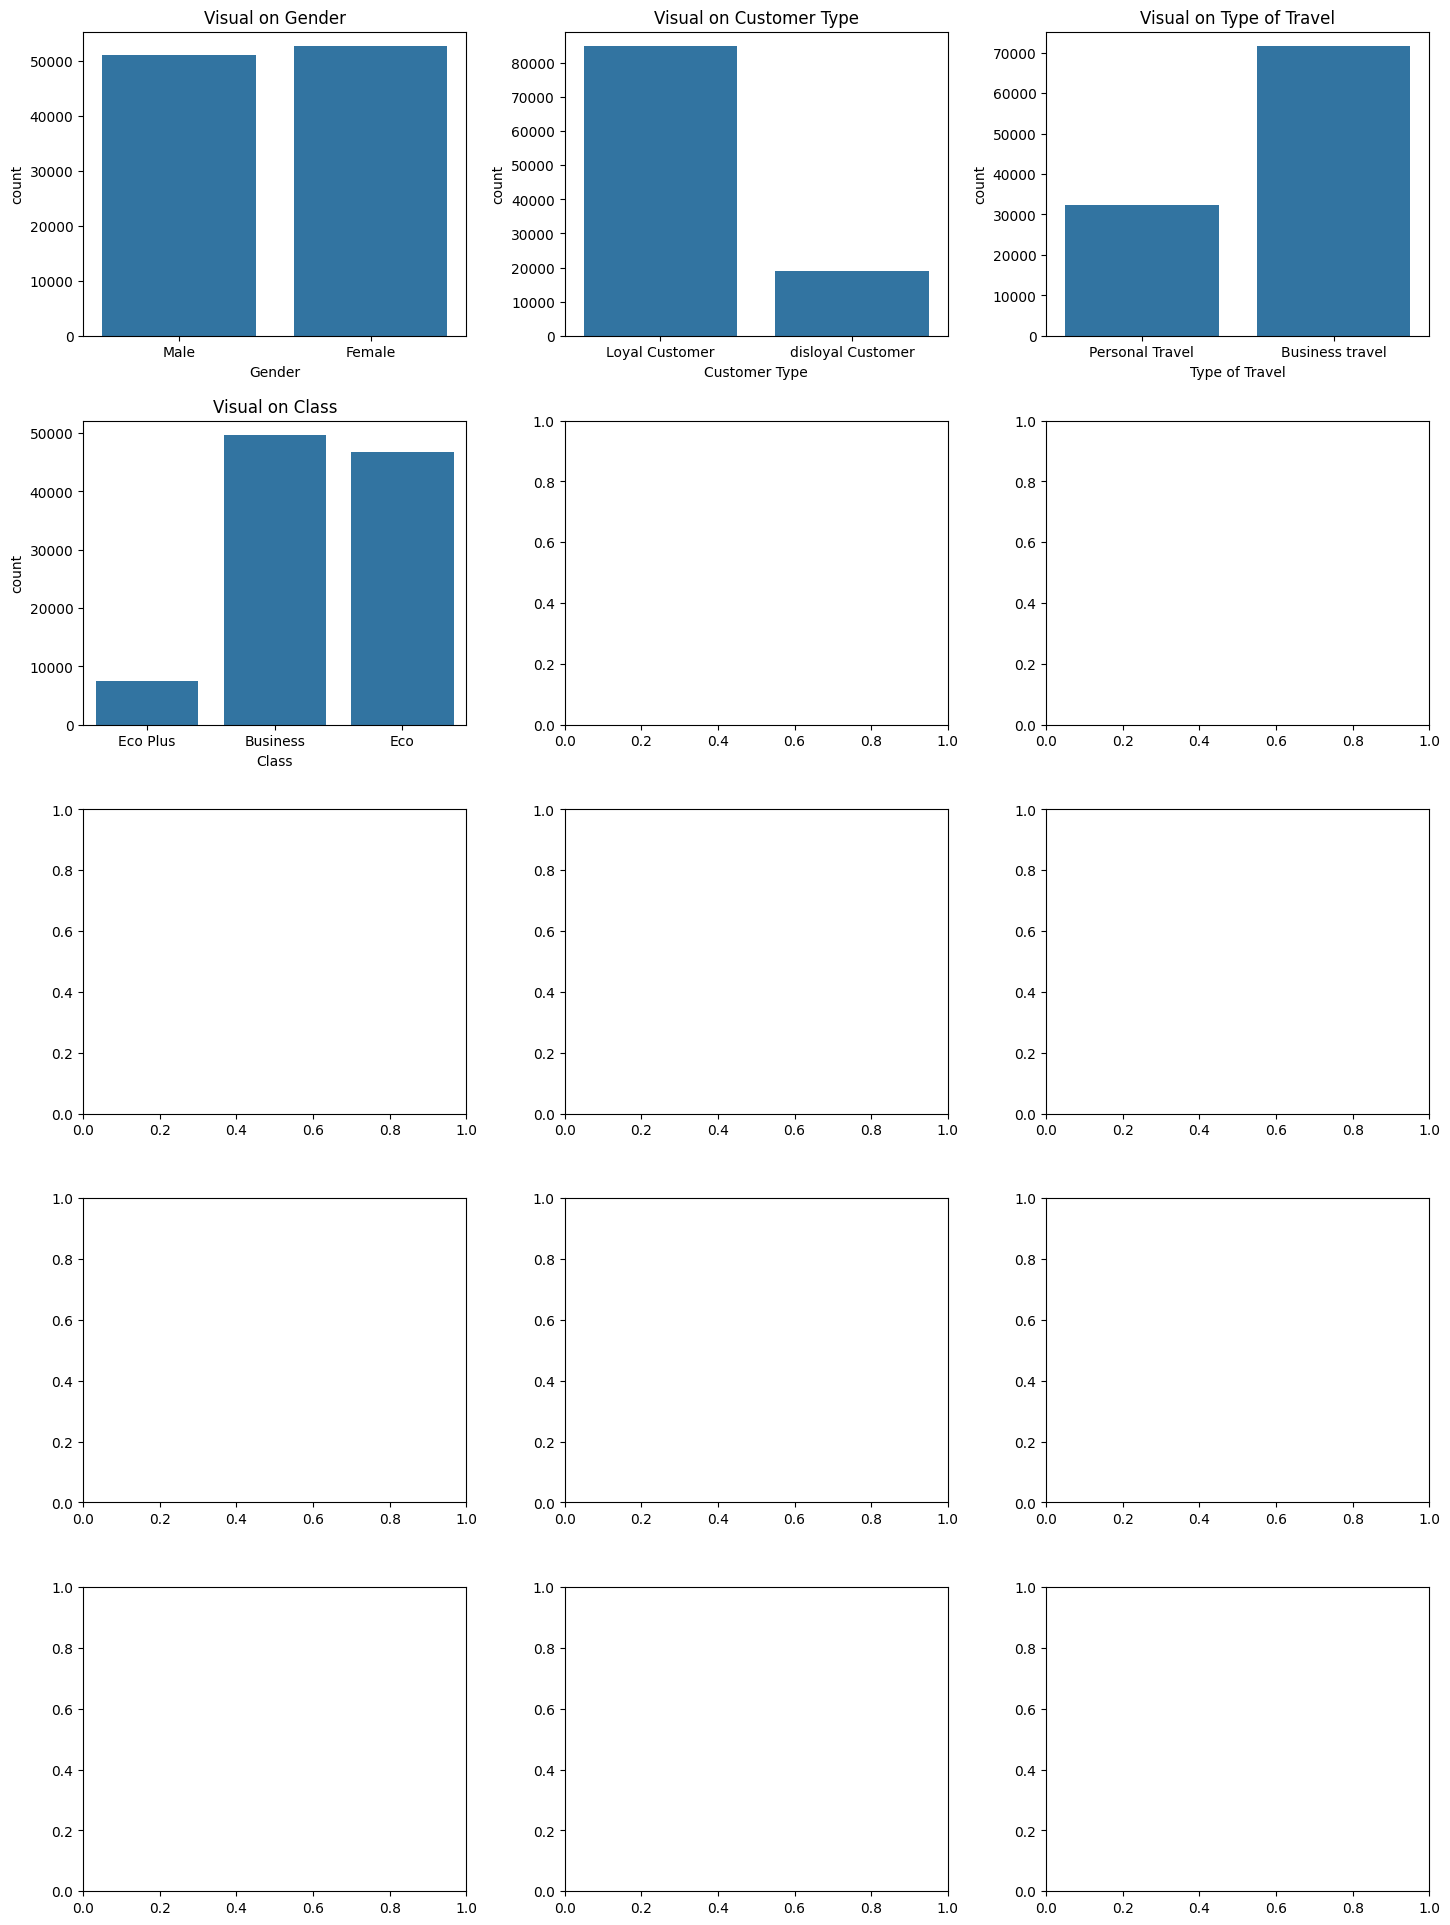

In [29]:
fig,axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
fig.tight_layout(pad=4.0)

axes = axes.ravel()

for idx, col in enumerate(Categorical[:len(axes)]):
    sns.countplot(data = data, x=col, ax=axes[idx])
    axes[idx].set_title(f'Visual on {col}')

plt.show

In [30]:
numerics = data.select_dtypes(include=['float64', 'int64'])

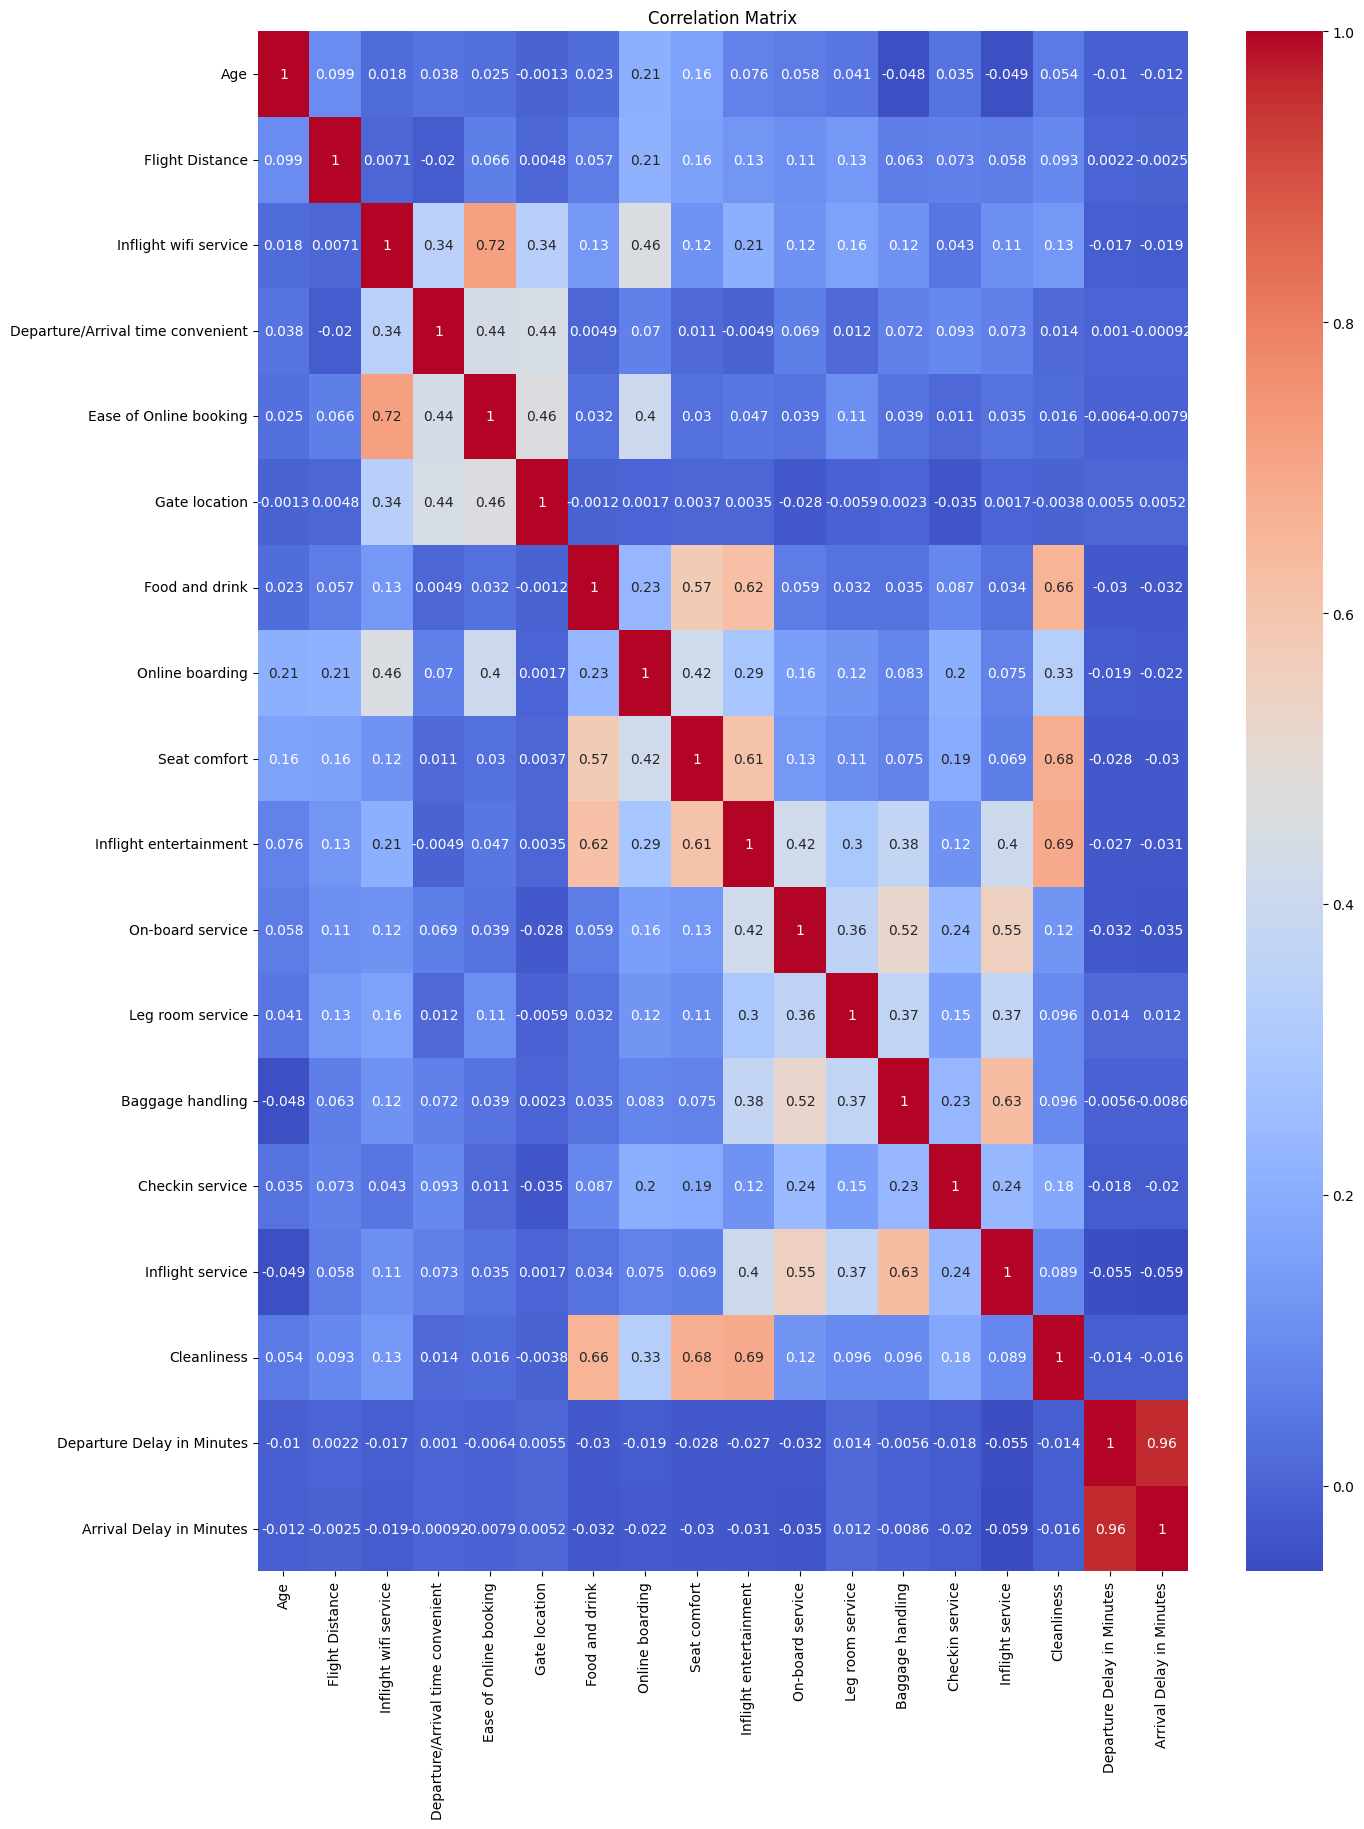

In [31]:
plt.figure(figsize=(15,20))
corr = numerics.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15

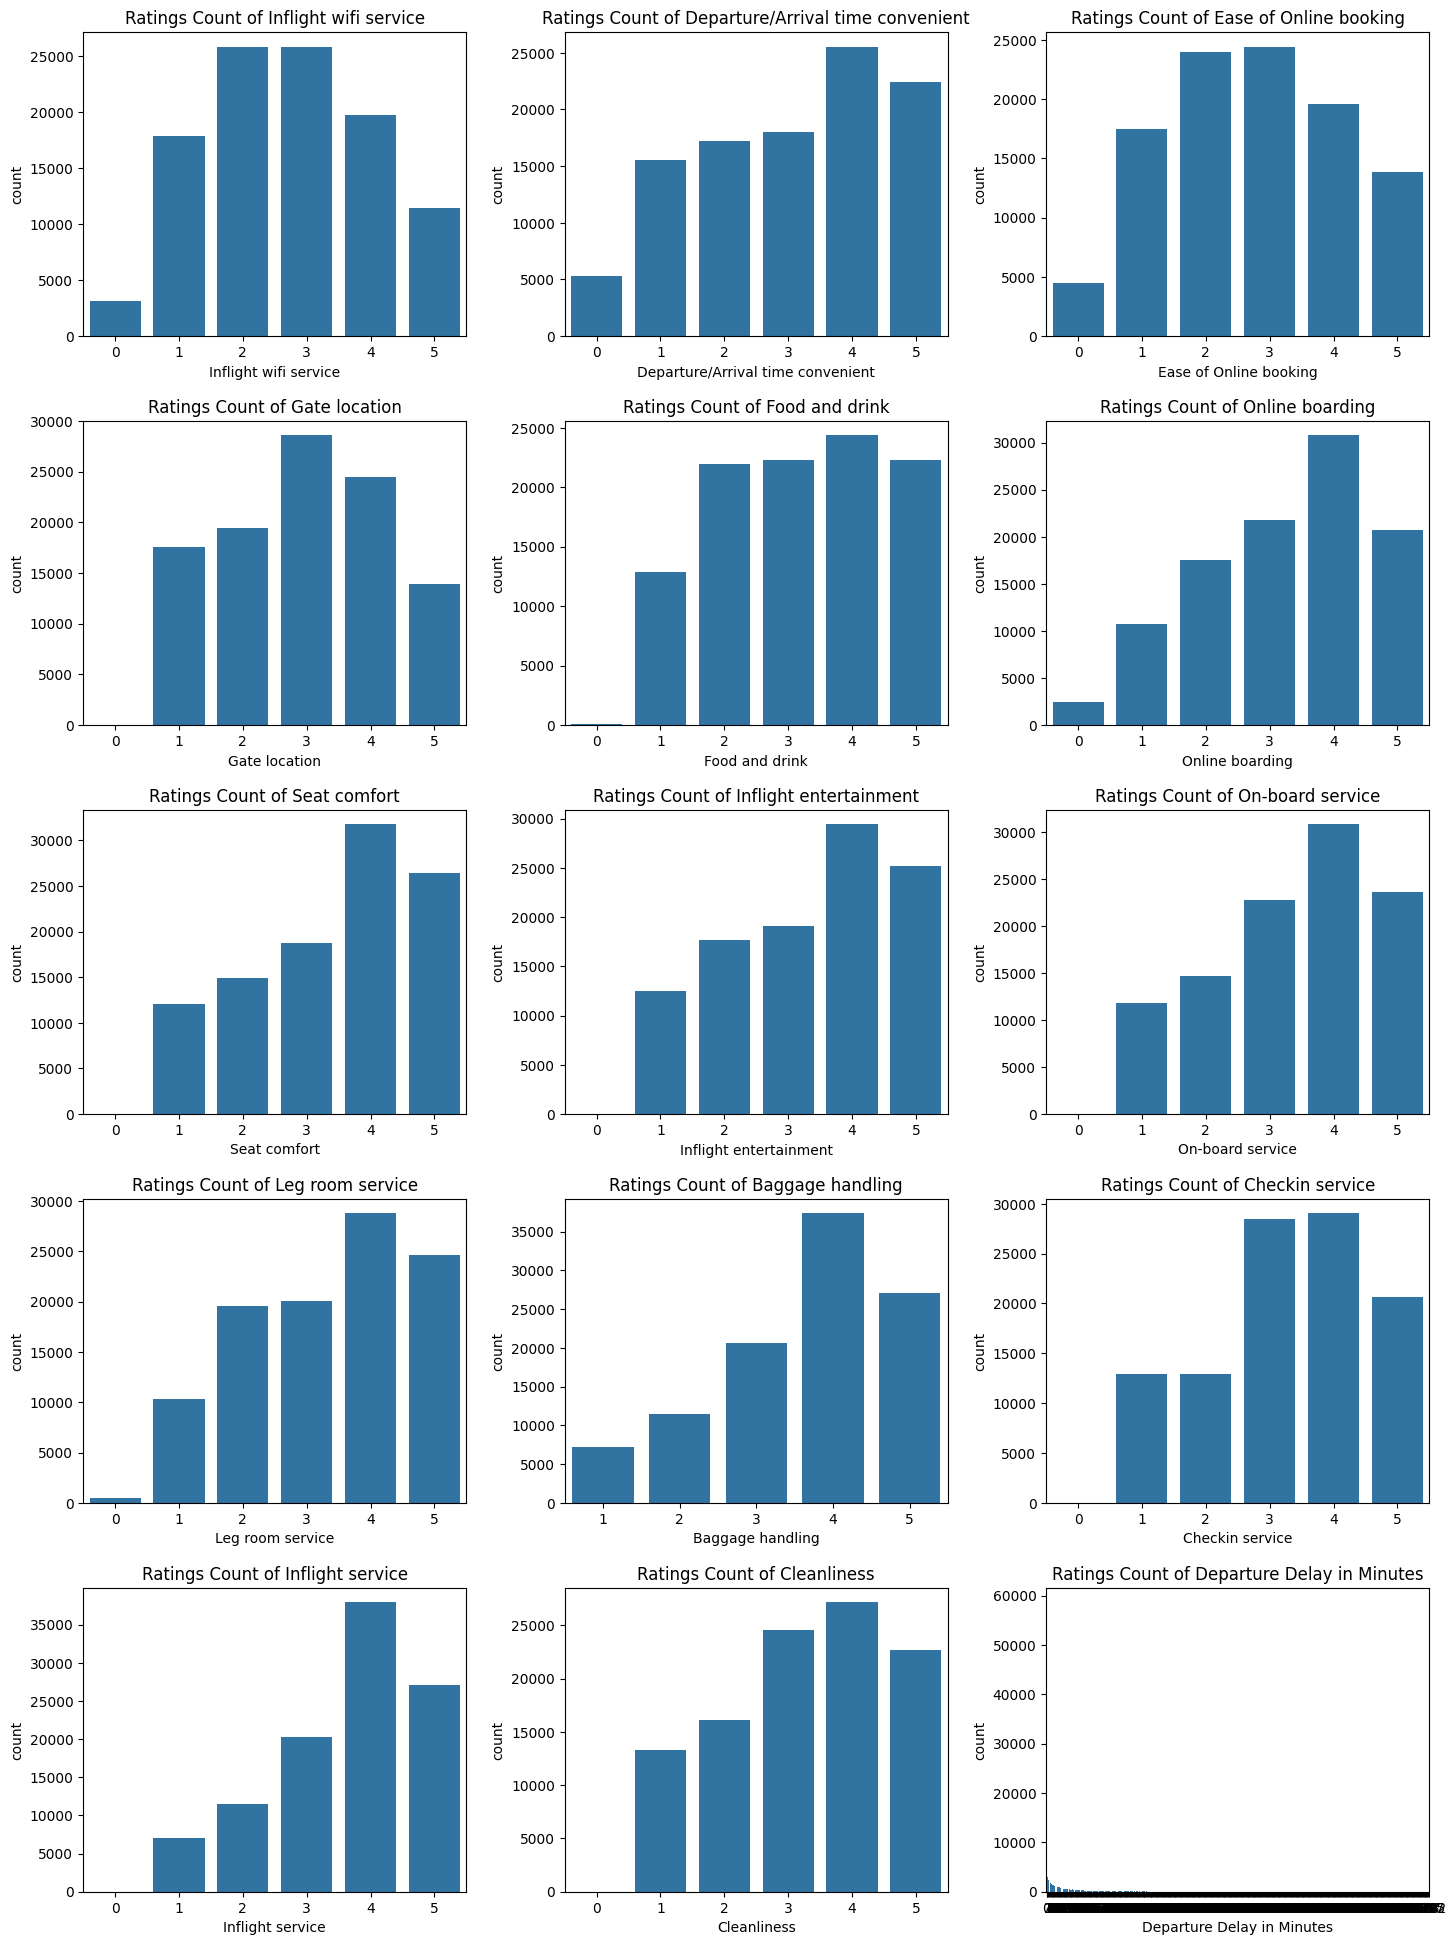

In [32]:
num = numerics.drop(columns=['Age','Flight Distance'] )
fig,axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
fig.tight_layout(pad=4.0)

axes = axes.ravel()

for idx, col in enumerate(num[:len(axes)]):
    sns.countplot(data = data, x=col, ax=axes[idx])
    axes[idx].set_title(f'Ratings Count of {col}')

plt.show

In [33]:
num_col = numerics.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])


In [34]:
data = pd.get_dummies(data,columns=Categorical, drop_first=True )
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [35]:
X = data.drop('satisfaction', axis = 1)
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

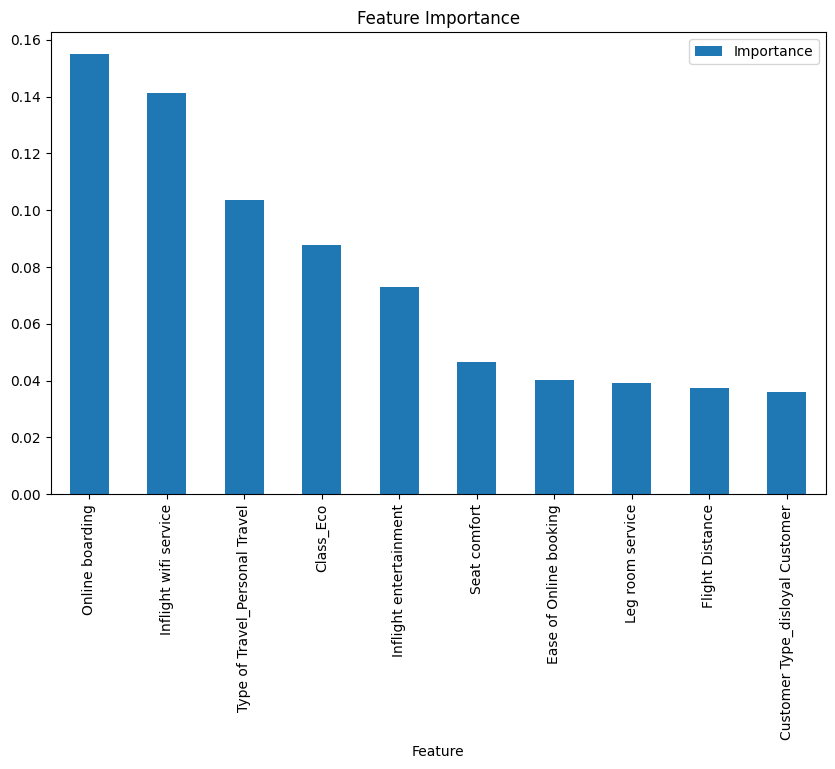

In [37]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False).head(10).plot(
    x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [38]:
y_pred = rf_model.predict(X_test)


In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9625946362119852
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17751
           1       0.97      0.94      0.96     13421

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SR.NO                              25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [41]:
test.isnull().sum()

SR.NO                                 0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
dtype: int64

In [42]:
test['Arrival Delay in Minutes'].fillna(0, inplace=True)

C:\Users\91770\AppData\Local\Temp\ipykernel_10652\722902389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Arrival Delay in Minutes'].fillna(0, inplace=True)


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SR.NO                              25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [44]:
test.drop(columns=['SR.NO', 'id'], inplace=True)

In [45]:
Categoricals = test.select_dtypes(include=['object']).columns

In [46]:
numerics = test.select_dtypes(include=['float64', 'int64'])

In [47]:
test = pd.get_dummies(test,columns=Categoricals, drop_first=True )


In [48]:
import joblib

joblib.dump(rf_model, 'Airline Satisfaction Predictor.pkl')

['Airline Satisfaction Predictor.pkl']

In [49]:
rf_model_loaded = joblib.load('Airline Satisfaction Predictor.pkl')

In [50]:
predictions = rf_model_loaded.predict(test)

In [51]:
test['Predicted_Satisfaction'] = predictions

In [54]:
test.to_csv('predictions.csv', index =False)
